##  Normal imports

In [ ]:
import numpy as np
import pandas as pd
from math import isnan
import collections

## Load Data

In [70]:
data = pd.read_csv('ATP Dataset_2012-01 to 2017-07_Int_V4.csv')
data

,ATP,Tournament,Tournament_Int,Date,Series,Series_Int,Court,Court_Int,Surface,Surface_Int,...,Player1,Player1_Int,Player2,Player2_Int,Player1_Rank,Player2_Rank,Player1_Odds,Player2_Odds,Player1_Implied_Prob,Player2_Implied_Prob
0,1,BrisbaneInternational,1.2757,42737,ATP250,2.9693,Outdoor,3.6494,Hard,4.4983,...,YmerE.,6.7633,ThompsonJ.,6.7926,160.0,79.0,3.50,1.29,0.2857,0.7752
1,1,BrisbaneInternational,1.2757,42737,ATP250,2.9693,Outdoor,3.6494,Hard,4.4983,...,MahutN.,6.9297,RobertS.,6.9686,39.0,54.0,1.54,2.43,0.6494,0.4115
2,1,BrisbaneInternational,1.2757,42737,ATP250,2.9693,Outdoor,3.6494,Hard,4.4983,...,TomicB.,6.5792,FerrerD.,6.3881,26.0,21.0,1.77,2.01,0.5650,0.4975
3,1,BrisbaneInternational,1.2757,42737,ATP250,2.9693,Outdoor,3.6494,Hard,4.4983,...,EdmundK.,6.8384,EscobedoE.,6.0929,45.0,141.0,1.37,3.01,0.7299,0.3322
4,1,BrisbaneInternational,1.2757,42737,ATP250,2.9693,Outdoor,3.6494,Hard,4.4983,...,JohnsonS.,6.7032,DimitrovG.,6.5157,33.0,17.0,2.85,1.41,0.3509,0.7092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14730,65,MastersCup,1.7532,41223,MastersCup,2.7079,Indoor,3.2579,Hard,4.4983,...,FedererR.,6.9997,DelPotroJ.M.,6.0310,2.0,7.0,1.42,2.82,0.7042,0.3546
14731,65,MastersCup,1.7532,41223,MastersCup,2.7079,Indoor,3.2579,Hard,4.4983,...,FerrerD.,6.3881,TipsarevicJ.,6.5461,5.0,9.0,1.20,4.55,0.8333,0.2198
14732,65,MastersCup,1.7532,41224,MastersCup,2.7079,Indoor,3.2579,Hard,4.4983,...,DelPotroJ.M.,6.0310,DjokovicN.,6.9457,7.0,1.0,4.28,1.22,0.2336,0.8197
14733,65,MastersCup,1.7532,41224,MastersCup,2.7079,Indoor,3.2579,Hard,4.4983,...,FedererR.,6.9997,MurrayA.,6.2537,2.0,3.0,2.16,1.68,0.4630,0.5952


In [71]:
#summary of stats. figure out what each column means/guide audience towards what columns i thought were interesting
data.describe()

,ATP,Tournament_Int,Date,Series_Int,Court_Int,Surface_Int,Round_Int,Best_of,Winner_Int,Player1_Int,Player2_Int,Player1_Rank,Player2_Rank,Player1_Odds,Player2_Odds,Player1_Implied_Prob,Player2_Implied_Prob
count,14735.000000,14735.000000,14735.000000,14735.000000,14735.000000,14735.000000,14735.000000,14735.000000,14735.000000,14735.000000,14735.000000,14712.000000,14720.000000,14735.000000,14735.000000,14735.000000,14735.000000
mean,31.636105,1.482577,41906.313946,2.765558,3.583003,4.424422,5.239369,3.395521,6.517008,6.514439,6.517430,72.220772,71.462296,2.791516,2.746633,0.528248,0.531096
std,17.644082,0.285704,594.931815,0.288050,0.146926,0.255293,0.180667,0.796648,0.287249,0.281424,0.281607,113.467454,94.554760,2.805987,2.632675,0.243353,0.243229
min,1.000000,1.007100,40909.000000,2.257400,3.257900,4.112900,5.125700,3.000000,6.009000,6.009000,6.004500,1.000000,1.000000,1.010000,1.010000,0.027400,0.031100
25%,19.000000,1.240800,41395.500000,2.648600,3.649400,4.112900,5.125700,3.000000,6.253700,6.260000,6.261600,22.000000,22.000000,1.380000,1.380000,0.334400,0.335600
50%,32.000000,1.432800,41879.000000,2.969300,3.649400,4.498300,5.135100,3.000000,6.496500,6.496500,6.504300,50.000000,50.000000,1.890000,1.870000,0.529100,0.534800
75%,47.000000,1.752900,42425.000000,2.969300,3.649400,4.498300,5.251100,3.000000,6.776300,6.765100,6.770000,87.000000,87.000000,2.990000,2.980000,0.724600,0.724600
max,66.000000,1.982000,42932.000000,2.970900,3.649400,4.919400,5.954200,5.000000,6.999700,6.999700,6.999700,7380.000000,1855.000000,36.440000,32.160000,0.990100,0.990100


## EDA

In [72]:
#looks like clean data, almost full count in every column (rarely missing data)
#lots of numbers to work with
#if i split up players by rank, could i do players with rank <= 10 to categorize the top players and analyze them specifically
#would the idea above count as a "new" dataset that was encouraged when we went over the outline of the presentation?
#could i see performance level based on the court type either hard or clay?
#based on maybe even one person, say DjokovicN, could i analyze whether he has better odds to win on hard court vs clay court?

In [73]:
data[(data['Player1'] == "FedererR.") | (data['Player2'] == "FedererR.")]

,ATP,Tournament,Tournament_Int,Date,Series,Series_Int,Court,Court_Int,Surface,Surface_Int,...,Player1,Player1_Int,Player2,Player2_Int,Player1_Rank,Player2_Rank,Player1_Odds,Player2_Odds,Player1_Implied_Prob,Player2_Implied_Prob
170,6,AustralianOpen,1.8566,42751,GrandSlam,2.9709,Outdoor,3.6494,Hard,4.4983,...,MelzerJ.,6.8466,FedererR.,6.9997,300.0,17.0,11.25,1.04,0.0889,0.9615
211,6,AustralianOpen,1.8566,42753,GrandSlam,2.9709,Outdoor,3.6494,Hard,4.4983,...,FedererR.,6.9997,RubinN.,6.3285,17.0,200.0,1.02,14.09,0.9804,0.0710
242,6,AustralianOpen,1.8566,42755,GrandSlam,2.9709,Outdoor,3.6494,Hard,4.4983,...,BerdychT.,6.2517,FedererR.,6.9997,10.0,17.0,2.46,1.54,0.4065,0.6494
254,6,AustralianOpen,1.8566,42757,GrandSlam,2.9709,Outdoor,3.6494,Hard,4.4983,...,NishikoriK.,6.1257,FedererR.,6.9997,5.0,17.0,2.29,1.61,0.4367,0.6211
260,6,AustralianOpen,1.8566,42759,GrandSlam,2.9709,Outdoor,3.6494,Hard,4.4983,...,ZverevM.,6.4668,FedererR.,6.9997,50.0,17.0,7.18,1.09,0.1393,0.9174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14722,65,MastersCup,1.7532,41219,MastersCup,2.7079,Indoor,3.2579,Hard,4.4983,...,TipsarevicJ.,6.5461,FedererR.,6.9997,9.0,2.0,7.26,1.09,0.1377,0.9174
14726,65,MastersCup,1.7532,41221,MastersCup,2.7079,Indoor,3.2579,Hard,4.4983,...,FerrerD.,6.3881,FedererR.,6.9997,5.0,2.0,4.61,1.20,0.2169,0.8333
14730,65,MastersCup,1.7532,41223,MastersCup,2.7079,Indoor,3.2579,Hard,4.4983,...,FedererR.,6.9997,DelPotroJ.M.,6.0310,2.0,7.0,1.42,2.82,0.7042,0.3546
14733,65,MastersCup,1.7532,41224,MastersCup,2.7079,Indoor,3.2579,Hard,4.4983,...,FedererR.,6.9997,MurrayA.,6.2537,2.0,3.0,2.16,1.68,0.4630,0.5952


In [74]:
#new dataframe only involving surfaces that are clay
surface1 = data[(data['Surface'] == "Clay")]
surface1

,ATP,Tournament,Tournament_Int,Date,Series,Series_Int,Court,Court_Int,Surface,Surface_Int,...,Player1,Player1_Int,Player2,Player2_Int,Player1_Rank,Player2_Rank,Player1_Odds,Player2_Odds,Player1_Implied_Prob,Player2_Implied_Prob
293,8,EcuadorOpen,1.7315,42772,ATP250,2.9693,Outdoor,3.6494,Clay,4.1129,...,MelzerG.,6.1868,ZeballosH.,6.7499,106.0,69.0,1.91,1.86,0.5236,0.5376
294,8,EcuadorOpen,1.7315,42772,ATP250,2.9693,Outdoor,3.6494,Clay,4.1129,...,BeckerB.,6.9841,GiraldoS.,6.9086,126.0,97.0,4.33,1.21,0.2309,0.8264
295,8,EcuadorOpen,1.7315,42772,ATP250,2.9693,Outdoor,3.6494,Clay,4.1129,...,TipsarevicJ.,6.5461,GimenoTraverD.,6.2848,101.0,114.0,1.29,3.53,0.7752,0.2833
296,8,EcuadorOpen,1.7315,42772,ATP250,2.9693,Outdoor,3.6494,Clay,4.1129,...,MonteiroT.,6.1866,LapenttiG.,6.9355,85.0,641.0,1.15,5.34,0.8696,0.1873
297,8,EcuadorOpen,1.7315,42773,ATP250,2.9693,Outdoor,3.6494,Clay,4.1129,...,OlivoR.,6.5205,GomezE.,6.6232,103.0,290.0,1.33,3.26,0.7519,0.3067
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13963,45,BetAtHomeCup,1.1269,41116,ATP250,2.9693,Outdoor,3.6494,Clay,4.1129,...,HaaseR.,6.2279,OdesnikW.,6.8539,42.0,148.0,1.72,2.11,0.5814,0.4739
13964,45,BetAtHomeCup,1.1269,41116,ATP250,2.9693,Outdoor,3.6494,Clay,4.1129,...,BolelliS.,6.1572,KlizanM.,6.3104,111.0,62.0,1.44,2.70,0.6944,0.3704
13965,45,BetAtHomeCup,1.1269,41117,ATP250,2.9693,Outdoor,3.6494,Clay,4.1129,...,KohlschreiberP.,6.5159,VolandriF.,6.4570,23.0,99.0,1.32,3.31,0.7576,0.3021
13966,45,BetAtHomeCup,1.1269,41117,ATP250,2.9693,Outdoor,3.6494,Clay,4.1129,...,KlizanM.,6.3104,HaaseR.,6.2279,62.0,42.0,2.26,1.61,0.4425,0.6211


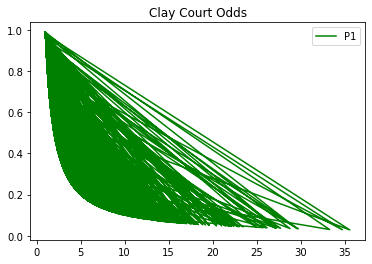

In [75]:
#random test
import matplotlib.pyplot as plt
plt.plot(surface1['Player1_Odds'], surface1['Player1_Implied_Prob'], label="P1", color='g')
plt.title('Clay Court Odds')
plt.legend()
plt.show()

In [76]:
surface1[(data['Player1'] == "FedererR.")]['Player1_Implied_Prob'].mean()

<ipython-input-76-799c31136184>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  surface1[(data['Player1'] == "FedererR.")]['Player1_Implied_Prob'].mean()


0.8283352941176473

In [77]:
surface1[(data['Player2'] == "FedererR.")]['Player2_Implied_Prob'].mean()

<ipython-input-77-12a0550ff265>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  surface1[(data['Player2'] == "FedererR.")]['Player2_Implied_Prob'].mean()


0.8334733333333335

In [78]:
#new dataframe only involving surfaces that are hard court
surface2 = data[(data['Surface'] == "Hard")]
surface2

,ATP,Tournament,Tournament_Int,Date,Series,Series_Int,Court,Court_Int,Surface,Surface_Int,...,Player1,Player1_Int,Player2,Player2_Int,Player1_Rank,Player2_Rank,Player1_Odds,Player2_Odds,Player1_Implied_Prob,Player2_Implied_Prob
0,1,BrisbaneInternational,1.2757,42737,ATP250,2.9693,Outdoor,3.6494,Hard,4.4983,...,YmerE.,6.7633,ThompsonJ.,6.7926,160.0,79.0,3.50,1.29,0.2857,0.7752
1,1,BrisbaneInternational,1.2757,42737,ATP250,2.9693,Outdoor,3.6494,Hard,4.4983,...,MahutN.,6.9297,RobertS.,6.9686,39.0,54.0,1.54,2.43,0.6494,0.4115
2,1,BrisbaneInternational,1.2757,42737,ATP250,2.9693,Outdoor,3.6494,Hard,4.4983,...,TomicB.,6.5792,FerrerD.,6.3881,26.0,21.0,1.77,2.01,0.5650,0.4975
3,1,BrisbaneInternational,1.2757,42737,ATP250,2.9693,Outdoor,3.6494,Hard,4.4983,...,EdmundK.,6.8384,EscobedoE.,6.0929,45.0,141.0,1.37,3.01,0.7299,0.3322
4,1,BrisbaneInternational,1.2757,42737,ATP250,2.9693,Outdoor,3.6494,Hard,4.4983,...,JohnsonS.,6.7032,DimitrovG.,6.5157,33.0,17.0,2.85,1.41,0.3509,0.7092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14730,65,MastersCup,1.7532,41223,MastersCup,2.7079,Indoor,3.2579,Hard,4.4983,...,FedererR.,6.9997,DelPotroJ.M.,6.0310,2.0,7.0,1.42,2.82,0.7042,0.3546
14731,65,MastersCup,1.7532,41223,MastersCup,2.7079,Indoor,3.2579,Hard,4.4983,...,FerrerD.,6.3881,TipsarevicJ.,6.5461,5.0,9.0,1.20,4.55,0.8333,0.2198
14732,65,MastersCup,1.7532,41224,MastersCup,2.7079,Indoor,3.2579,Hard,4.4983,...,DelPotroJ.M.,6.0310,DjokovicN.,6.9457,7.0,1.0,4.28,1.22,0.2336,0.8197
14733,65,MastersCup,1.7532,41224,MastersCup,2.7079,Indoor,3.2579,Hard,4.4983,...,FedererR.,6.9997,MurrayA.,6.2537,2.0,3.0,2.16,1.68,0.4630,0.5952


In [79]:
surface3 = data[(data['Surface'] == "Grass")]
surface3

,ATP,Tournament,Tournament_Int,Date,Series,Series_Int,Court,Court_Int,Surface,Surface_Int,...,Player1,Player1_Int,Player2,Player2_Int,Player1_Rank,Player2_Rank,Player1_Odds,Player2_Odds,Player1_Implied_Prob,Player2_Implied_Prob
1353,34,RicohOpen,1.0593,42898,ATP250,2.9693,Outdoor,3.6494,Grass,4.9194,...,BedeneA.,6.2650,IstominD.,6.8624,59.0,74.0,2.16,1.68,0.4630,0.5952
1354,34,RicohOpen,1.0593,42898,ATP250,2.9693,Outdoor,3.6494,Grass,4.9194,...,ItoT.,6.5484,SeppiA.,6.5043,174.0,76.0,2.67,1.46,0.3745,0.6849
1355,34,RicohOpen,1.0593,42898,ATP250,2.9693,Outdoor,3.6494,Grass,4.9194,...,MahutN.,6.9297,NovikovD.,6.5052,82.0,172.0,1.20,4.46,0.8333,0.2242
1356,34,RicohOpen,1.0593,42898,ATP250,2.9693,Outdoor,3.6494,Grass,4.9194,...,GriekspoorT.,6.3023,PospisilV.,6.8633,282.0,83.0,6.77,1.10,0.1477,0.9091
1357,34,RicohOpen,1.0593,42899,ATP250,2.9693,Outdoor,3.6494,Grass,4.9194,...,DolgopolovO.,6.8643,DarcisS.,6.8219,81.0,56.0,1.61,2.29,0.6211,0.4367
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13798,39,HallofFameChampionships,1.6264,41103,ATP250,2.9693,Outdoor,3.6494,Grass,4.9194,...,VanDerMerweI.,6.9568,IsnerJ.,6.2262,155.0,11.0,5.61,1.13,0.1783,0.8850
13799,39,HallofFameChampionships,1.6264,41103,ATP250,2.9693,Outdoor,3.6494,Grass,4.9194,...,HarrisonR.,6.4046,BeckerB.,6.9841,48.0,112.0,1.77,2.01,0.5650,0.4975
13800,39,HallofFameChampionships,1.6264,41104,ATP250,2.9693,Outdoor,3.6494,Grass,4.9194,...,RamR.,6.1508,HewittL.,6.8946,118.0,233.0,2.88,1.40,0.3472,0.7143
13801,39,HallofFameChampionships,1.6264,41104,ATP250,2.9693,Outdoor,3.6494,Grass,4.9194,...,IsnerJ.,6.2262,HarrisonR.,6.4046,11.0,48.0,1.53,2.46,0.6536,0.4065


In [80]:
surface2[(data['Player1'] == "FedererR.")]['Player1_Implied_Prob'].mean()

<ipython-input-80-84beddd864f8>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  surface2[(data['Player1'] == "FedererR.")]['Player1_Implied_Prob'].mean()


0.8105966101694916

In [81]:
surface2[(data['Player2'] == "FedererR.")]['Player2_Implied_Prob'].mean()

<ipython-input-81-97da26b66ffe>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  surface2[(data['Player2'] == "FedererR.")]['Player2_Implied_Prob'].mean()


0.8242698113207546

In [82]:
data.Surface.value_counts()

Hard     8083
Clay     4823
Grass    1829
Name: Surface, dtype: int64

In [83]:
data.groupby(['Player1', 'Surface']).mean()

ATP  Tournament_Int          Date  Series_Int  \
Player1    Surface                                                        
AhoudaA.   Clay     22.000000        1.599600  42838.000000    2.969300   
AlMutawaJ. Hard      3.000000        1.972700  40910.000000    2.969300   
AlawadhiO. Hard     17.000000        1.288000  42794.000000    2.648600   
AlbotR.    Clay     25.000000        1.630800  42701.600000    2.905160   
           Grass    39.000000        1.504440  42843.600000    2.970260   
...                       ...             ...           ...         ...   
ZverevA.   Grass    36.941176        1.294688  42585.588235    2.799988   
           Hard     32.054054        1.587911  42526.027027    2.623959   
ZverevM.   Clay     31.500000        1.454250  42833.000000    2.840425   
           Grass    36.400000        1.489720  42614.000000    2.905480   
           Hard     37.608696        1.514009  42528.391304    2.728161   

                    Court_Int  Surface_Int  Round_Int   Best_of  Winner_Int  \
Player1    Surface                                                            
AhoudaA.   Clay      3.649400       4.1129   5.251100  3.000000    6.810900   
AlMutawaJ. Hard      3.649400       4.4983   5.125700  3.000000    6.948700   
AlawadhiO. Hard      3.649400       4.4983   5.125700  3.000000    6.923800   
AlbotR.    Clay      3.649400       4.1129   5.150780  3.000000    6.425120   
           Grass     3.649400       4.9194   5.200940  4.200000    6.574540   
...                       ...          ...        ...       ...         ...   
ZverevA.   Grass     3.649400       4.9194   5.266188  3.588235    6.659200   
           Hard      3.501265       4.4983   5.265108  3.162162    6.655473   
ZverevM.   Clay      3.649400       4.1129   5.178975  3.250000    6.547862   
           Grass     3.649400       4.9194   5.172700  3.200000    6.615120   
           Hard      3.479183       4.4983   5.258991  3.434783    6.552600   

                    Player1_Int  Player2_Int  Player1_Rank  Player2_Rank  \
Player1    Surface                                                         
AhoudaA.   Clay          6.4517     6.810900    946.000000     59.000000   
AlMutawaJ. Hard          6.4856     6.948700           NaN     75.000000   
AlawadhiO. Hard          6.1509     6.923800           NaN     57.000000   
AlbotR.    Clay          6.5301     6.400140    112.400000     82.400000   
           Grass         6.5301     6.638080    111.600000     49.600000   
...                         ...          ...           ...           ...   
ZverevA.   Grass         6.7700     6.442924     36.529412     75.588235   
           Hard          6.7700     6.532522     49.918919     56.108108   
ZverevM.   Clay          6.4668     6.541637     45.750000     71.000000   
           Grass         6.4668     6.615270    137.000000     63.400000   
           Hard          6.4668     6.591813    107.086957     53.043478   

                    Player1_Odds  Player2_Odds  Player1_Implied_Prob  \
Player1    Surface                                                     
AhoudaA.   Clay         8.720000      1.060000              0.114700   
AlMutawaJ. Hard        15.020000      1.020000              0.066600   
AlawadhiO. Hard        21.530000      1.010000              0.046400   
AlbotR.    Clay         2.952000      1.434000              0.355420   
           Grass        3.620000      2.148000              0.423260   
...                          ...           ...                   ...   
ZverevA.   Grass        1.821765      3.524118              0.638971   
           Hard         2.275135      2.525676              0.546514   
ZverevM.   Clay         2.570000      1.752500              0.434750   
           Grass        3.328000      2.158000              0.502390   
           Hard         3.066957      1.998696              0.472591   

                    Player2_Implied_Prob  
Player1    Surface                        
AhoudaA.  

In [84]:
data.groupby(['Player2', 'Surface']).mean()

ATP  Tournament_Int          Date  Series_Int  \
Player2   Surface                                                        
AguilarJ. Clay     12.000000        1.486000  41318.000000    2.969300   
AhoudaA.  Clay     22.000000        1.599600  42650.500000    2.969300   
AlbotR.   Clay     32.375000        1.513875  42337.375000    2.969700   
          Grass    38.500000        1.536000  42732.500000    2.970100   
          Hard     33.777778        1.431344  42405.000000    2.969656   
...                      ...             ...           ...         ...   
ZverevA.  Grass    37.083333        1.307200  42575.333333    2.809483   
          Hard     33.593750        1.494797  42489.718750    2.743619   
ZverevM.  Clay     29.692308        1.458223  42504.230769    2.835231   
          Grass    35.666667        1.481000  42214.444444    2.933844   
          Hard     39.862069        1.543466  42367.620690    2.766828   

                   Court_Int  Surface_Int  Round_Int   Best_of  Winner_Int  \
Player2   Surface                                                            
AguilarJ. Clay       3.25790       4.1129   5.125700  3.000000    6.545000   
AhoudaA.  Clay       3.64940       4.1129   5.125700  3.000000    6.481550   
AlbotR.   Clay       3.64940       4.1129   5.157050  3.500000    6.495037   
          Grass      3.64940       4.9194   5.387300  4.000000    6.517200   
          Hard       3.47540       4.4983   5.139633  3.444444    6.618867   
...                      ...          ...        ...       ...         ...   
ZverevA.  Grass      3.64940       4.9194   5.265633  3.666667    6.734625   
          Hard       3.45365       4.4983   5.254472  3.250000    6.614500   
ZverevM.  Clay       3.64940       4.1129   5.211023  3.153846    6.402146   
          Grass      3.64940       4.9194   5.341900  3.222222    6.594644   
          Hard       3.48740       4.4983   5.208679  3.137931    6.536362   

                   Player1_Int  Player2_Int  Player1_Rank  Player2_Rank  \
Player2   Surface                                                         
AguilarJ. Clay        6.545000       6.5809     93.000000    191.000000   
AhoudaA.  Clay        6.600500       6.4517     75.000000    890.000000   
AlbotR.   Clay        6.466525       6.5301     82.750000    148.625000   
          Grass       6.478700       6.5301     97.000000    113.000000   
          Hard        6.616889       6.5301    127.222222    116.555556   
...                        ...          ...           ...           ...   
ZverevA.  Grass       6.527450       6.7700     67.333333     41.416667   
          Hard        6.460444       6.7700     82.406250     55.312500   
ZverevM.  Clay        6.438454       6.4668     48.538462    177.230769   
          Grass       6.519478       6.4668     94.777778    164.666667   
          Hard        6.613862       6.4668     64.344828    159.827586   

                   Player1_Odds  Player2_Odds  Player1_Implied_Prob  \
Player2   Surface                                                     
AguilarJ. Clay         1.260000      3.770000              0.793700   
AhoudaA.  Clay         1.015000     14.950000              0.985250   
AlbotR.   Clay         1.536250      3.908750              0.730725   
          Grass        2.550000      2.285000              0.508600   
          Hard         1.712222      4.041111              0.727689   
...                         ...           ...                   ...   
ZverevA.  Grass        3.612500      1.833333              0.422333   
          Hard         2.442500      2.631875              0.519922   
ZverevM.  Clay         1.553077      3.351538              0.675985   
          Grass        2.311111      3.900000              0.545300   
          Hard         1.818621      3.499655              0.641834   

                   Player2_Implied_Prob  
Player2   Surface                        
AguilarJ. Clay                 0.265300  
AhoudaA.  Clay       

In [85]:
#could my aha moment be that FedererR has higher odds to win on clay than hard court?

In [86]:
data.corr()

,ATP,Tournament_Int,Date,Series_Int,Court_Int,Surface_Int,Round_Int,Best_of,Winner_Int,Player1_Int,Player2_Int,Player1_Rank,Player2_Rank,Player1_Odds,Player2_Odds,Player1_Implied_Prob,Player2_Implied_Prob
ATP,1.000000,-0.102188,0.043176,-0.100409,-0.193119,0.153430,0.009065,-0.013168,0.005551,0.004515,-0.001986,-0.033746,-0.030171,-0.003705,-0.021594,-0.008450,0.007480
Tournament_Int,-0.102188,1.000000,-0.029020,0.129545,-0.119421,0.102777,0.005126,-0.112240,0.026948,0.021829,0.011036,0.025523,0.030430,-0.021188,-0.018187,-0.003574,0.005512
Date,0.043176,-0.029020,1.000000,-0.027995,0.034621,0.025724,0.004893,0.015879,0.012984,0.003097,-0.010934,-0.001328,0.011073,-0.018236,-0.021654,-0.003638,-0.001347
Series_Int,-0.100409,0.129545,-0.027995,1.000000,-0.090773,0.086256,0.028450,0.353950,0.007658,-0.000919,-0.001048,0.138153,0.166014,0.010421,0.007058,0.001394,-0.001249
Court_Int,-0.193119,-0.119421,0.034621,-0.090773,1.000000,-0.086556,-0.058359,0.224378,-0.004230,-0.005232,-0.000302,-0.001775,0.001306,0.054512,0.051533,-0.003730,0.000698
Surface_Int,0.153430,0.102777,0.025724,0.086256,-0.086556,1.000000,0.001956,0.160154,0.046489,0.036699,0.019590,-0.019124,-0.010846,0.008316,0.024220,0.009204,-0.010461
Round_Int,0.009065,0.005126,0.004893,0.028450,-0.058359,0.001956,1.000000,-0.041361,-0.003620,-0.011331,0.001706,-0.134082,-0.157553,0.013895,0.011797,-0.002123,-0.001043
Best_of,-0.013168,-0.112240,0.015879,0.353950,0.224378,0.160154,-0.041361,1.000000,0.002556,-0.000197,0.003882,-0.020667,-0.035442,0.161746,0.146877,-0.009206,0.000903
Winner_Int,0.005551,0.026948,0.012984,0.007658,-0.004230,0.046489,-0.003620,0.002556,1.000000,0.503818,0.503949,-0.013602,0.005580,0.019994,0.008083,-0.002206,0.001432
Player1_Int,0.004515,0.021829,0.003097,-0.000919,-0.005232,0.036699,-0.011331,-0.000197,0.503818,1.000000,-0.012840,-0.018101,0.015577,-0.005637,0.007564,-0.006841,0.006736


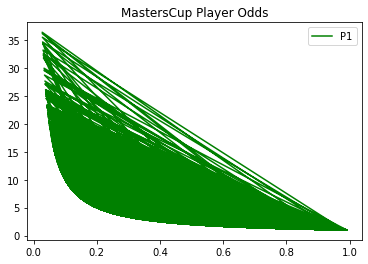

In [87]:
#seems like Player1_Odds are semi correlated to Player1_Implied_Prob and same for Player2
import matplotlib.pyplot as plt
plt.plot(data['Player1_Implied_Prob'], data['Player1_Odds'], label="P1", color='g')
plt.title('MastersCup Player Odds')
plt.legend()
plt.show()

In [88]:
data[['Player1', 'Player1_Rank']].sort_values(by='Player1_Rank', ascending=True)[:100]

,Player1,Player1_Rank
7801,NadalR.,1.0
14528,FedererR.,1.0
9737,DjokovicN.,1.0
7417,NadalR.,1.0
9294,DjokovicN.,1.0
...,...,...
4339,DjokovicN.,1.0
7673,NadalR.,1.0
11019,DjokovicN.,1.0
7687,NadalR.,1.0


In [89]:
data[['Player2', 'Player2_Rank']].sort_values(by='Player2_Rank', ascending=True)[:100]

,Player2,Player2_Rank
14734,DjokovicN.,1.0
1449,MurrayA.,1.0
4880,DjokovicN.,1.0
10636,DjokovicN.,1.0
2206,DjokovicN.,1.0
...,...,...
1600,MurrayA.,1.0
7984,NadalR.,1.0
5910,DjokovicN.,1.0
8050,NadalR.,1.0


In [90]:
data.groupby(['Player1']).mean()

,ATP,Tournament_Int,Date,Series_Int,Court_Int,Surface_Int,Round_Int,Best_of,Winner_Int,Player1_Int,Player2_Int,Player1_Rank,Player2_Rank,Player1_Odds,Player2_Odds,Player1_Implied_Prob,Player2_Implied_Prob
Player1,,,,,,,,,,,,,,,,,
AhoudaA.,22.000000,1.599600,42838.000000,2.969300,3.649400,4.112900,5.251100,3.000000,6.810900,6.4517,6.810900,946.000000,59.000000,8.720000,1.060000,0.114700,0.943400
AlMutawaJ.,3.000000,1.972700,40910.000000,2.969300,3.649400,4.498300,5.125700,3.000000,6.948700,6.4856,6.948700,NaN,75.000000,15.020000,1.020000,0.066600,0.980400
AlawadhiO.,17.000000,1.288000,42794.000000,2.648600,3.649400,4.498300,5.125700,3.000000,6.923800,6.1509,6.923800,NaN,57.000000,21.530000,1.010000,0.046400,0.990100
AlbotR.,33.090909,1.525318,42671.681818,2.890368,3.542627,4.506414,5.159900,3.454545,6.535936,6.5301,6.568409,104.727273,61.954545,3.454091,1.600909,0.364464,0.693650
AliMutawaJ.M.,3.000000,1.972700,41275.000000,2.969300,3.649400,4.498300,5.125700,3.000000,6.604500,6.4854,6.604500,NaN,455.000000,13.290000,1.020000,0.075200,0.980400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZhangZh.,56.000000,1.383700,42276.000000,2.969300,3.649400,4.498300,5.125700,3.000000,6.506500,6.5065,6.703300,583.000000,118.000000,3.280000,1.330000,0.304900,0.751900
ZiadiM.,21.000000,1.599600,41190.500000,2.969300,3.649400,4.112900,5.125700,3.000000,6.476700,6.4908,6.476700,685.000000,239.500000,10.510000,1.040000,0.096800,0.961650
ZoppJ.,39.866667,1.467673,41316.933333,2.948560,3.571100,4.374593,5.167500,3.800000,6.590660,6.6794,6.511433,146.866667,94.400000,3.751333,1.971333,0.423887,0.636853


In [91]:
players = set([p for p in data['Player1']])

In [92]:
players2 = set([p for p in data['Player2']])

In [93]:
players.update(players2)

In [94]:
players

{'AguilarJ.',
 'AhoudaA.',
 'AlMutawaJ.',
 'AlawadhiO.',
 'AlbotR.',
 'AliMutawaJ.M.',
 'AlmagroN.',
 'AltamiranoC.',
 'AltmaierD.',
 'AlundM.',
 'AlvesT.',
 'AmritrajP.',
 'AndersonK.',
 'AndersonO.',
 'AndreevI.',
 'AndreozziG.',
 'AndroicT.',
 'AndujarP.',
 'ArguelloF.',
 'ArnaboldiA.',
 'ArtunedoMartinavarroA.',
 'ArvidssonI.',
 'AuthomM.',
 'AwadhyO.',
 'BachingerM.',
 'BaghdatisM.',
 'BagnisF.',
 'BaiY.',
 'BakerB.',
 'BakerJ.',
 'BalazsA.',
 'BalleretB.',
 'BaludaV.',
 'BarrereG.',
 'BarrientosN.',
 'BartonM.',
 'BasicM.',
 'BasilashviliN.',
 'BautistaAgutR.',
 'BautistaR.',
 'BeckA.',
 'BeckK.',
 'BeckerB.',
 'BedeneA.',
 'BellierA.',
 'BellottiR.',
 'BellucciT.',
 'BemelmansR.',
 'BenneteauJ.',
 'BerankisR.',
 'BerdychT.',
 'BerlocqC.',
 'BerrerM.',
 'BerrettiniM.',
 'BesterP.',
 'BetovS.',
 'BhambriY.',
 'BiryukovM.',
 'BlakeJ.',
 'BogaertsR.',
 'BogomolovA.',
 'BohliS.',
 'BolelliS.',
 'BoltA.',
 'BonziB.',
 'BopannaR.',
 'BosselA.',
 'BourgueM.',
 'BozoljacI.',
 'BrandsD.',

In [95]:
data[(data['Player1'] == "FedererR.") | (data['Player2'] == "FedererR.")]

,ATP,Tournament,Tournament_Int,Date,Series,Series_Int,Court,Court_Int,Surface,Surface_Int,...,Player1,Player1_Int,Player2,Player2_Int,Player1_Rank,Player2_Rank,Player1_Odds,Player2_Odds,Player1_Implied_Prob,Player2_Implied_Prob
170,6,AustralianOpen,1.8566,42751,GrandSlam,2.9709,Outdoor,3.6494,Hard,4.4983,...,MelzerJ.,6.8466,FedererR.,6.9997,300.0,17.0,11.25,1.04,0.0889,0.9615
211,6,AustralianOpen,1.8566,42753,GrandSlam,2.9709,Outdoor,3.6494,Hard,4.4983,...,FedererR.,6.9997,RubinN.,6.3285,17.0,200.0,1.02,14.09,0.9804,0.0710
242,6,AustralianOpen,1.8566,42755,GrandSlam,2.9709,Outdoor,3.6494,Hard,4.4983,...,BerdychT.,6.2517,FedererR.,6.9997,10.0,17.0,2.46,1.54,0.4065,0.6494
254,6,AustralianOpen,1.8566,42757,GrandSlam,2.9709,Outdoor,3.6494,Hard,4.4983,...,NishikoriK.,6.1257,FedererR.,6.9997,5.0,17.0,2.29,1.61,0.4367,0.6211
260,6,AustralianOpen,1.8566,42759,GrandSlam,2.9709,Outdoor,3.6494,Hard,4.4983,...,ZverevM.,6.4668,FedererR.,6.9997,50.0,17.0,7.18,1.09,0.1393,0.9174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14722,65,MastersCup,1.7532,41219,MastersCup,2.7079,Indoor,3.2579,Hard,4.4983,...,TipsarevicJ.,6.5461,FedererR.,6.9997,9.0,2.0,7.26,1.09,0.1377,0.9174
14726,65,MastersCup,1.7532,41221,MastersCup,2.7079,Indoor,3.2579,Hard,4.4983,...,FerrerD.,6.3881,FedererR.,6.9997,5.0,2.0,4.61,1.20,0.2169,0.8333
14730,65,MastersCup,1.7532,41223,MastersCup,2.7079,Indoor,3.2579,Hard,4.4983,...,FedererR.,6.9997,DelPotroJ.M.,6.0310,2.0,7.0,1.42,2.82,0.7042,0.3546
14733,65,MastersCup,1.7532,41224,MastersCup,2.7079,Indoor,3.2579,Hard,4.4983,...,FedererR.,6.9997,MurrayA.,6.2537,2.0,3.0,2.16,1.68,0.4630,0.5952


In [96]:
surface1[(data['Player1'] == "FedererR.")]['Player1_Implied_Prob'].mean()

<ipython-input-96-799c31136184>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  surface1[(data['Player1'] == "FedererR.")]['Player1_Implied_Prob'].mean()


0.8283352941176473

In [97]:
surface2[(data['Player2'] == "FedererR.")]['Player2_Implied_Prob'].mean()

<ipython-input-97-97da26b66ffe>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  surface2[(data['Player2'] == "FedererR.")]['Player2_Implied_Prob'].mean()


0.8242698113207546

## Data Structs and Feature Generation

In [98]:
player_dict = collections.defaultdict(dict)
for surface in data.Surface.unique():
    for p in players:
        p1 = data[(data['Player1'] == p) & (data['Surface'] == surface)]['Player1_Implied_Prob'].mean()
        p2 = data[(data['Player2'] == p) & (data['Surface'] == surface)]['Player2_Implied_Prob'].mean()
        if isnan(p1) or isnan(p2):
            continue
        else:
            player_dict[p][surface] = (p1 + p2) / 2



#player: surface: mean:

In [99]:
surface2[(data['Player1'] == "FedererR.")]['Player1_Implied_Prob'].mean()

<ipython-input-99-84beddd864f8>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  surface2[(data['Player1'] == "FedererR.")]['Player1_Implied_Prob'].mean()


0.8105966101694916

In [100]:
data.Surface.unique()

array(['Hard', 'Clay', 'Grass'], dtype=object)

In [101]:
player_dict

defaultdict(dict,
            {'HutaGalungJ.': {'Hard': 0.3216041666666667},
             'MarcanD.': {'Hard': 0.1467},
             'YouzhnyM.': {'Hard': 0.5582204062882812,
              'Clay': 0.5431481366459625,
              'Grass': 0.5572069117647059},
             'DutraSilvaR.': {'Hard': 0.17611428571428572,
              'Clay': 0.4073832720588235,
              'Grass': 0.2736},
             'NedovyesovA.': {'Hard': 0.3311033333333333,
              'Clay': 0.37787249999999994,
              'Grass': 0.266475},
             'LaaksonenH.': {'Hard': 0.29481499999999994,
              'Clay': 0.31519499999999995},
             'RamR.': {'Hard': 0.37943282051282046,
              'Clay': 0.2847458333333333,
              'Grass': 0.4980236111111111},
             'ElginM.': {'Hard': 0.11649999999999999},
             'WangC.': {'Hard': 0.15055},
             'DarcisS.': {'Hard': 0.4619576923076924,
              'Clay': 0.40606428571428577,
              'Grass': 0.419564285714

In [102]:
max_dict = collections.defaultdict()
for p,s in player_dict.items():
    temp = max(s.values())
    temp2 = min(s.values())
    if temp == temp2:
        continue
    else:
        max_dict[p] = temp - temp2

In [103]:
type(max_dict)

collections.defaultdict

In [104]:
sorted_max_dict = {k: v for k,v in sorted(max_dict.items(),key=lambda item:item[1],reverse=True)}
sorted_max_dict

{'DiezS.': 0.39919999999999994,
 'AndreozziG.': 0.33347499999999997,
 'MahutN.': 0.33142081730769246,
 'DelbonisF.': 0.3287142907801418,
 'SchwartzmanD.': 0.31212428571428574,
 'VolandriF.': 0.31140177848575706,
 'CarrenoBustaP.': 0.30870350877192987,
 'AndujarP.': 0.29332172670097195,
 'SkugorF.': 0.2779125,
 'SweetingR.': 0.27617500000000006,
 'RamosA.': 0.2704078658929724,
 'BagnisF.': 0.26717761904761905,
 'CuevasP.': 0.26670068181818185,
 'GimenoTraverD.': 0.26286963235294114,
 'BerlocqC.': 0.25650181384742954,
 'LlodraM.': 0.2555738095238095,
 'BellucciT.': 0.2525651368760064,
 'LuY.H.': 0.25049506887499257,
 'GolubevA.': 0.24649999999999997,
 'CervantesI.': 0.2404875,
 'EliasG.': 0.23175119047619047,
 'DutraSilvaR.': 0.2312689863445378,
 'CoricB.': 0.22881319444444448,
 'RamirezHidalgoR.': 0.22840486111111108,
 'MontanesA.': 0.22644886877828052,
 'KravchukK.': 0.2257952380952381,
 'PellaG.': 0.22429880952380957,
 'MonteiroT.': 0.2236510606060606,
 'LorenziP.': 0.2220395098039216

In [105]:
top5 = []
for w in sorted(max_dict, key=max_dict.get, reverse=True):
    top5.append(w)

In [106]:
top5

['DiezS.',
 'AndreozziG.',
 'MahutN.',
 'DelbonisF.',
 'SchwartzmanD.',
 'VolandriF.',
 'CarrenoBustaP.',
 'AndujarP.',
 'SkugorF.',
 'SweetingR.',
 'RamosA.',
 'BagnisF.',
 'CuevasP.',
 'GimenoTraverD.',
 'BerlocqC.',
 'LlodraM.',
 'BellucciT.',
 'LuY.H.',
 'GolubevA.',
 'CervantesI.',
 'EliasG.',
 'DutraSilvaR.',
 'CoricB.',
 'RamirezHidalgoR.',
 'MontanesA.',
 'KravchukK.',
 'PellaG.',
 'MonteiroT.',
 'LorenziP.',
 'RamosVinolasA.',
 'BeckerB.',
 'ChelaJ.I.',
 'AndreevI.',
 'HewittL.',
 'RamR.',
 'MachadoR.',
 'LajovicD.',
 'RolaB.',
 'PavicM.',
 'SugitaY.',
 'TiafoeF.',
 'SelaD.',
 'HerbertP.H',
 'UngurA.',
 'MillmanJ.',
 'KlahnB.',
 'MullerG.',
 'ShapovalovD.',
 'GilF.',
 'PetzschnerP.',
 'WangJ.',
 'GiannessiA.',
 'ZeballosH.',
 'LevineJ.',
 'CopilM.',
 'HajekJ.',
 'ItoT.',
 'LackoL.',
 'KlizanM.',
 'RublevA.',
 'DzumhurD.',
 'HanescuV.',
 'GonzalezM.',
 'KudlaD.',
 'DonskoyE.',
 'FerreroJ.C.',
 'MartererM.',
 'MedvedevD.',
 'MalisseX.',
 'WilliamsR.',
 'OdesnikW.',
 'BeckA.',
 '

In [107]:
for surface in data.Surface.unique():
    p1 = data[data['Surface'] == surface]['Player1_Implied_Prob'].mean()
    p2 = data[data['Surface'] == surface]['Player2_Implied_Prob'].mean()
    if isnan(p1) or isnan(p2):
        continue
    else:
        print(surface,p1,p2)

Hard 0.5305485092168729 0.5290706668316206
Clay 0.5240691893012658 0.5353283018867929
Grass 0.5291011481683977 0.528884581738655


In [108]:
pd.qcut(list(sorted_max_dict.values()), 3, labels=['bottom', 'middle', 'top'])

['top', 'top', 'top', 'top', 'top', ..., 'bottom', 'bottom', 'bottom', 'bottom', 'bottom']
Length: 258
Categories (3, object): ['bottom' < 'middle' < 'top']

In [109]:
#new dataframe - player name, quantile, variance
new_df = pd.DataFrame(sorted_max_dict.items(), columns = ['Name', 'Difference'])

In [110]:
new_df['quantiles'] = pd.qcut(list(sorted_max_dict.values()), 3, labels=['bottom', 'middle', 'top'])

In [111]:
#make a graph x axis is name y axis is difference (top 20?)
new_df

,Name,Difference,quantiles
0,DiezS.,0.399200,top
1,AndreozziG.,0.333475,top
2,MahutN.,0.331421,top
3,DelbonisF.,0.328714,top
4,SchwartzmanD.,0.312124,top
...,...,...,...
253,KozlovS.,0.011077,bottom
254,SoedaG.,0.010516,bottom
255,DolgopolovO.,0.009012,bottom
256,ReisterJ.,0.007047,bottom


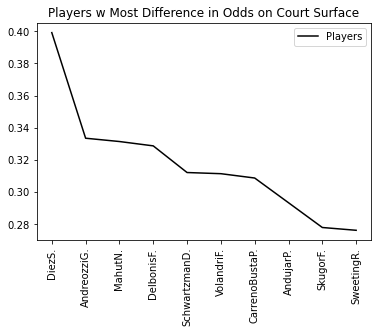

In [112]:
import matplotlib.pyplot as plt
df = new_df[:10]
x = df['Name']
y = df['Difference']
plt.plot(x, y, label = "Players", color = "black")
plt.title('Players w Most Difference in Odds on Court Surface')
plt.legend()
plt.xticks(rotation= 90)
plt.show()

In [113]:
#clay
print(surface1[(data['Player1'] == "DiezS.")]['Player1_Implied_Prob'])
print(surface1[(data['Player2'] == "DiezS.")]['Player2_Implied_Prob'])

914     0.2309
2640    0.3534
Name: Player1_Implied_Prob, dtype: float64
3335    0.9434
Name: Player2_Implied_Prob, dtype: float64


<ipython-input-113-81f0dc2578d5>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(surface1[(data['Player1'] == "DiezS.")]['Player1_Implied_Prob'])
<ipython-input-113-81f0dc2578d5>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(surface1[(data['Player2'] == "DiezS.")]['Player2_Implied_Prob'])


In [114]:
#hard
print(surface2[(data['Player1'] == "DiezS.")]['Player1_Implied_Prob'])
print(surface2[(data['Player2'] == "DiezS.")]['Player2_Implied_Prob'])

3509    0.1792
8664    0.3731
Name: Player1_Implied_Prob, dtype: float64
3537    0.161
Name: Player2_Implied_Prob, dtype: float64


<ipython-input-114-33b326a8f7c3>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(surface2[(data['Player1'] == "DiezS.")]['Player1_Implied_Prob'])
<ipython-input-114-33b326a8f7c3>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(surface2[(data['Player2'] == "DiezS.")]['Player2_Implied_Prob'])


In [115]:
#grass
print(surface3[(data['Player1'] == "DiezS.")]['Player1_Implied_Prob'])
print(surface3[(data['Player2'] == "DiezS.")]['Player2_Implied_Prob'])

Series([], Name: Player1_Implied_Prob, dtype: float64)
Series([], Name: Player2_Implied_Prob, dtype: float64)


<ipython-input-115-b689564248c4>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(surface3[(data['Player1'] == "DiezS.")]['Player1_Implied_Prob'])
<ipython-input-115-b689564248c4>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  print(surface3[(data['Player2'] == "DiezS.")]['Player2_Implied_Prob'])


In [116]:
data.groupby(['Tournament']).mean()

,ATP,Tournament_Int,Date,Series_Int,Court_Int,Surface_Int,Round_Int,Best_of,Winner_Int,Player1_Int,Player2_Int,Player1_Rank,Player2_Rank,Player1_Odds,Player2_Odds,Player1_Implied_Prob,Player2_Implied_Prob
Tournament,,,,,,,,,,,,,,,,,
ABNAMROWorldTennisTournament,11.166667,1.5841,41865.397849,2.648600,3.2579,4.4983,5.236674,3.000000,6.469301,6.480289,6.484633,52.666667,47.526882,2.655000,2.635806,0.532577,0.528081
AEGONChampionships,35.081395,1.9114,41833.972868,2.853699,3.6494,4.9194,5.218244,3.000000,6.541757,6.539479,6.525839,75.852713,67.482490,2.710969,2.503333,0.516240,0.543413
AEGONInternational,36.000000,1.6011,41811.342593,2.969300,3.6494,4.9194,5.253115,3.000000,6.614604,6.549281,6.619119,59.944444,64.629630,2.292778,2.158148,0.517999,0.542555
AEGONOpen,38.000000,1.5804,42360.170213,2.648600,3.6494,4.9194,5.221840,3.000000,6.553161,6.552439,6.502562,67.457447,104.744681,2.162447,2.259681,0.541618,0.519783
ASBClassic,4.000000,1.7837,42563.555556,2.969300,3.6494,4.4983,5.253115,3.000000,6.470513,6.452835,6.493454,72.132075,85.148148,2.413519,2.534630,0.523461,0.535909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ValenciaOpen500,62.966667,1.3877,41735.650000,2.648600,3.2579,4.4983,5.240373,3.000000,6.483954,6.515845,6.482147,46.175000,45.600000,2.252583,2.446917,0.547003,0.514338
Western&SouthernFinancialGroupMasters,49.400000,1.2907,41866.745455,2.257400,3.6494,4.4983,5.207856,3.000000,6.507775,6.507783,6.522295,35.478102,39.716364,2.482727,2.649309,0.536290,0.523547
Wimbledon,38.166667,1.3782,42002.254593,2.970900,3.6494,4.9194,5.224102,4.984252,6.523802,6.527393,6.512255,69.716535,69.221785,3.535289,3.522730,0.526982,0.528042


In [117]:
data.head()

,ATP,Tournament,Tournament_Int,Date,Series,Series_Int,Court,Court_Int,Surface,Surface_Int,...,Player1,Player1_Int,Player2,Player2_Int,Player1_Rank,Player2_Rank,Player1_Odds,Player2_Odds,Player1_Implied_Prob,Player2_Implied_Prob
0,1,BrisbaneInternational,1.2757,42737,ATP250,2.9693,Outdoor,3.6494,Hard,4.4983,...,YmerE.,6.7633,ThompsonJ.,6.7926,160.0,79.0,3.50,1.29,0.2857,0.7752
1,1,BrisbaneInternational,1.2757,42737,ATP250,2.9693,Outdoor,3.6494,Hard,4.4983,...,MahutN.,6.9297,RobertS.,6.9686,39.0,54.0,1.54,2.43,0.6494,0.4115
2,1,BrisbaneInternational,1.2757,42737,ATP250,2.9693,Outdoor,3.6494,Hard,4.4983,...,TomicB.,6.5792,FerrerD.,6.3881,26.0,21.0,1.77,2.01,0.5650,0.4975
3,1,BrisbaneInternational,1.2757,42737,ATP250,2.9693,Outdoor,3.6494,Hard,4.4983,...,EdmundK.,6.8384,EscobedoE.,6.0929,45.0,141.0,1.37,3.01,0.7299,0.3322
4,1,BrisbaneInternational,1.2757,42737,ATP250,2.9693,Outdoor,3.6494,Hard,4.4983,...,JohnsonS.,6.7032,DimitrovG.,6.5157,33.0,17.0,2.85,1.41,0.3509,0.7092


In [118]:
filtered_data = data[['Tournament','Series',
       'Court', 'Court_Int', 'Surface', 'Surface_Int',
       'Best_of', 'Winner', 'Winner_Int', 'Player1', 'Player1_Int', 'Player2',
       'Player2_Int', 'Player1_Rank', 'Player2_Rank', 'Player1_Odds',
       'Player2_Odds', 'Player1_Implied_Prob', 'Player2_Implied_Prob']]

In [119]:
filtered_data['P1_Abs_Prob'] = abs(filtered_data['Player1_Implied_Prob'] - filtered_data['Player2_Implied_Prob'])
filtered_data['Highest_Player'] = filtered_data[['Player1_Rank','Player2_Rank']].min(axis=1)
filtered_data.head()

<ipython-input-119-94df99f5d0b5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['P1_Abs_Prob'] = abs(filtered_data['Player1_Implied_Prob'] - filtered_data['Player2_Implied_Prob'])
<ipython-input-119-94df99f5d0b5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Highest_Player'] = filtered_data[['Player1_Rank','Player2_Rank']].min(axis=1)


,Tournament,Series,Court,Court_Int,Surface,Surface_Int,Best_of,Winner,Winner_Int,Player1,...,Player2,Player2_Int,Player1_Rank,Player2_Rank,Player1_Odds,Player2_Odds,Player1_Implied_Prob,Player2_Implied_Prob,P1_Abs_Prob,Highest_Player
0,BrisbaneInternational,ATP250,Outdoor,3.6494,Hard,4.4983,3,ThompsonJ.,6.7926,YmerE.,...,ThompsonJ.,6.7926,160.0,79.0,3.50,1.29,0.2857,0.7752,0.4895,79.0
1,BrisbaneInternational,ATP250,Outdoor,3.6494,Hard,4.4983,3,MahutN.,6.9297,MahutN.,...,RobertS.,6.9686,39.0,54.0,1.54,2.43,0.6494,0.4115,0.2379,39.0
2,BrisbaneInternational,ATP250,Outdoor,3.6494,Hard,4.4983,3,FerrerD.,6.3881,TomicB.,...,FerrerD.,6.3881,26.0,21.0,1.77,2.01,0.5650,0.4975,0.0675,21.0
3,BrisbaneInternational,ATP250,Outdoor,3.6494,Hard,4.4983,3,EdmundK.,6.8384,EdmundK.,...,EscobedoE.,6.0929,45.0,141.0,1.37,3.01,0.7299,0.3322,0.3977,45.0
4,BrisbaneInternational,ATP250,Outdoor,3.6494,Hard,4.4983,3,DimitrovG.,6.5157,JohnsonS.,...,DimitrovG.,6.5157,33.0,17.0,2.85,1.41,0.3509,0.7092,0.3583,17.0


## Clustering

In [120]:
#copy and past kmeans thing from class
#is everything that has k = 3 an Open for example
from sklearn.cluster import KMeans
temp_data = filtered_data.groupby('Tournament').mean()
model_data = temp_data
model_data.head()
wcss=[]
for i in range(3,19):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=42)
    kmeans.fit(model_data)
    wcss.append(kmeans.inertia_)

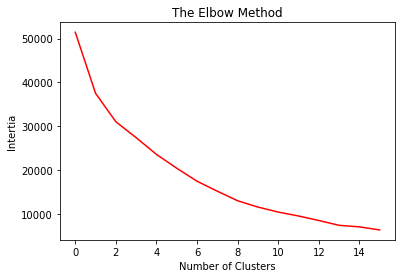

In [121]:
import matplotlib.pyplot as plt
plt.plot(range(len(wcss)), wcss, color='r')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Intertia')
plt.show()

In [122]:
k_means = KMeans(n_clusters=6, init="random", n_init=1, max_iter=5, random_state=42)

In [123]:
y_kmeans = k_means.fit_predict(model_data)

In [124]:
model_data['y_kmeans'] = y_kmeans

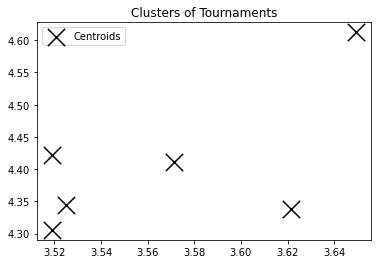

In [125]:
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], s = 300, c = 'black', marker='x', label = 'Centroids')
plt.title('Clusters of Tournaments')
plt.legend()
plt.show()

In [126]:
cluster_results = model_data.groupby('y_kmeans').mean()

In [127]:
cluster_results

,Court_Int,Surface_Int,Best_of,Winner_Int,Player1_Int,Player2_Int,Player1_Rank,Player2_Rank,Player1_Odds,Player2_Odds,Player1_Implied_Prob,Player2_Implied_Prob,P1_Abs_Prob,Highest_Player
y_kmeans,,,,,,,,,,,,,,
0,3.518900,4.421220,3.000000,6.519557,6.513422,6.516611,41.617878,41.105283,2.798027,2.758625,0.529530,0.529554,0.431699,20.212087
1,3.621436,4.338229,3.000000,6.544036,6.530817,6.534952,123.945797,124.537572,2.294292,2.362182,0.535606,0.525516,0.334159,70.121335
2,3.518900,4.305600,3.000000,6.565390,6.547196,6.559912,116.422255,77.200995,2.641741,2.425440,0.503341,0.558407,0.404873,45.882958
3,3.649400,4.612500,3.000000,6.497000,6.501376,6.479848,82.219743,131.816838,2.274848,2.696987,0.552575,0.508777,0.370658,55.443720
4,3.571100,4.410618,3.228121,6.517484,6.515733,6.518088,71.994697,72.074047,2.644846,2.559540,0.523385,0.536758,0.388592,38.328405
5,3.524832,4.344807,3.000000,6.493436,6.497771,6.494862,91.242404,96.023454,2.303294,2.387812,0.540610,0.520323,0.352982,51.169810


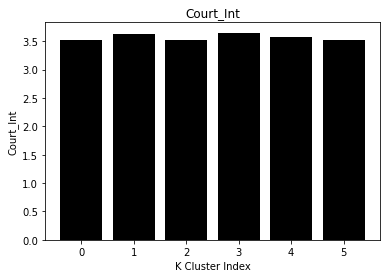

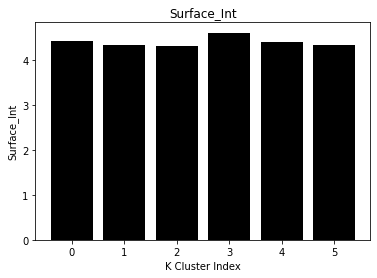

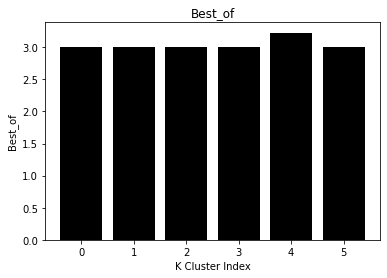

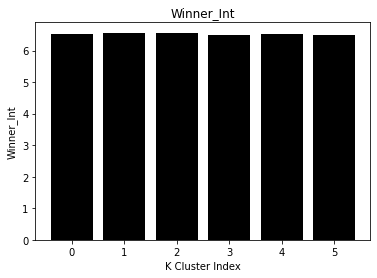

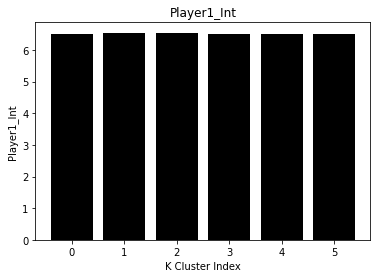

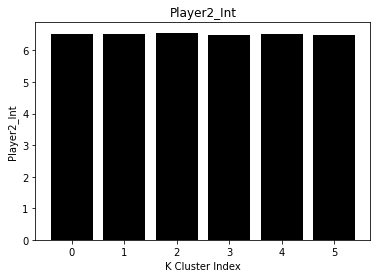

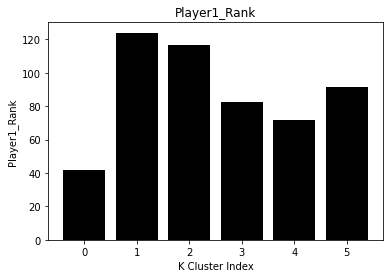

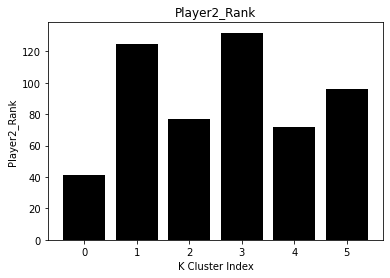

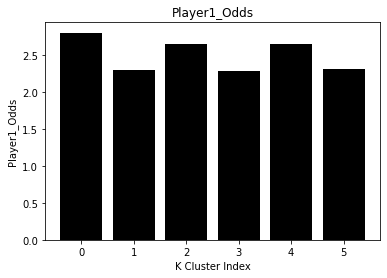

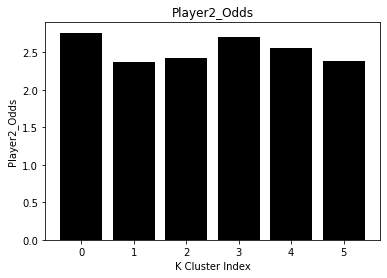

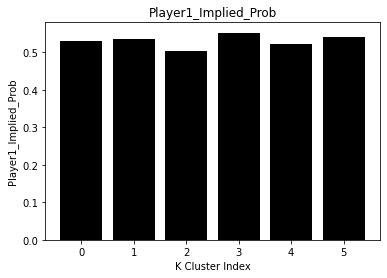

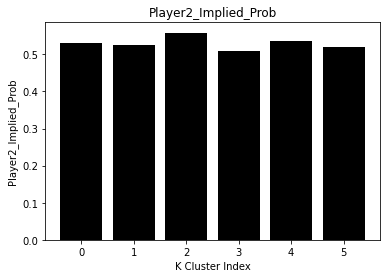

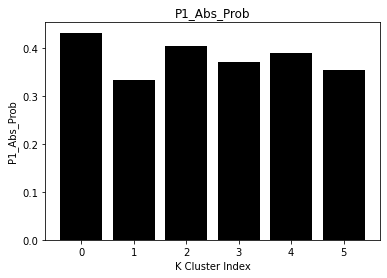

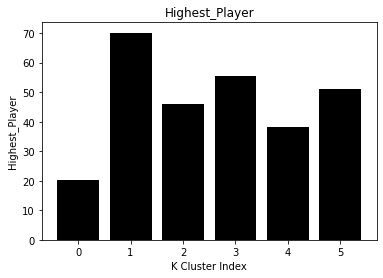

In [128]:
for col in cluster_results.columns:
    plt.bar(cluster_results.index,cluster_results[col], color='k')
    plt.title(col)
    plt.xlabel('K Cluster Index')
    plt.ylabel(col)
    plt.show()
    #Cluster 0
    #Highest_Player: when Highest_Player is low, P1_Abs_Prob is higher bc better players are playing worse ranked players
    #find examples of this

In [129]:
model_data.head()

,Court_Int,Surface_Int,Best_of,Winner_Int,Player1_Int,Player2_Int,Player1_Rank,Player2_Rank,Player1_Odds,Player2_Odds,Player1_Implied_Prob,Player2_Implied_Prob,P1_Abs_Prob,Highest_Player,y_kmeans
Tournament,,,,,,,,,,,,,,,
ABNAMROWorldTennisTournament,3.2579,4.4983,3.0,6.469301,6.480289,6.484633,52.666667,47.526882,2.655000,2.635806,0.532577,0.528081,0.414453,21.591398,0
AEGONChampionships,3.6494,4.9194,3.0,6.541757,6.539479,6.525839,75.852713,67.482490,2.710969,2.503333,0.516240,0.543413,0.417172,34.577519,4
AEGONInternational,3.6494,4.9194,3.0,6.614604,6.549281,6.619119,59.944444,64.629630,2.292778,2.158148,0.517999,0.542555,0.296061,37.629630,4
AEGONOpen,3.6494,4.9194,3.0,6.553161,6.552439,6.502562,67.457447,104.744681,2.162447,2.259681,0.541618,0.519783,0.320450,48.510638,5
ASBClassic,3.6494,4.4983,3.0,6.470513,6.452835,6.493454,72.132075,85.148148,2.413519,2.534630,0.523461,0.535909,0.343656,31.481481,4


In [130]:
cluster_0 = model_data[model_data['y_kmeans'] == 0]

In [131]:
cluster_0.sort_values('P1_Abs_Prob', ascending=False)[:25]
#higher odds so tennis players are generally not as good
#avg match played is either with players not as good

,Court_Int,Surface_Int,Best_of,Winner_Int,Player1_Int,Player2_Int,Player1_Rank,Player2_Rank,Player1_Odds,Player2_Odds,Player1_Implied_Prob,Player2_Implied_Prob,P1_Abs_Prob,Highest_Player,y_kmeans
Tournament,,,,,,,,,,,,,,,
DubaiTennisChampionships,3.6494,4.4983,3.0,6.547195,6.499311,6.542171,53.701087,53.564516,4.190860,3.141882,0.498716,0.558803,0.542504,24.220430,0
ChinaOpen,3.6494,4.4983,3.0,6.552985,6.572870,6.488667,35.154839,41.451613,2.927548,3.427613,0.554955,0.504497,0.475488,16.870968,0
InternazionaliBNLdItalia,3.6494,4.1129,3.0,6.510853,6.513881,6.526494,40.145455,37.900000,2.991909,2.774364,0.513127,0.545014,0.455458,18.427273,0
ShanghaiMasters,3.6494,4.4983,3.0,6.553466,6.543224,6.528243,44.007273,39.352727,2.906145,2.827527,0.520129,0.538252,0.448662,17.821818,0
MonteCarloMasters,3.6494,4.1129,3.0,6.515871,6.512743,6.529252,40.844037,42.226300,2.872561,2.929787,0.524573,0.534308,0.444402,19.875000,0
MastersCup,3.2579,4.4983,3.0,6.640229,6.511743,6.563999,4.586667,4.546667,2.578533,2.668133,0.542632,0.511175,0.441241,2.733333,0
SwissIndoors,3.2579,4.4983,3.0,6.543021,6.555375,6.507688,48.219355,46.393548,2.940839,2.745935,0.519721,0.540792,0.440491,25.251613,0
RogersMasters,3.6494,4.4983,3.0,6.520081,6.493552,6.544397,49.748120,48.364662,2.561278,2.787293,0.546873,0.512806,0.423207,22.639098,0
MutuaMadridOpen,3.6494,4.1129,3.0,6.482128,6.503723,6.501283,33.696970,36.115152,2.910576,2.538000,0.517243,0.541292,0.419835,18.066667,0


In [132]:
data[data['Tournament'] == 'DubaiTennisChampionships']

,ATP,Tournament,Tournament_Int,Date,Series,Series_Int,Court,Court_Int,Surface,Surface_Int,...,Player1,Player1_Int,Player2,Player2_Int,Player1_Rank,Player2_Rank,Player1_Odds,Player2_Odds,Player1_Implied_Prob,Player2_Implied_Prob
552,17,DubaiTennisChampionships,1.288,42793,ATP500,2.6486,Outdoor,3.6494,Hard,4.4983,...,VeselyJ.,6.1474,GranollersM.,6.6896,55.0,36.0,2.14,1.69,0.4673,0.5917
553,17,DubaiTennisChampionships,1.288,42793,ATP500,2.6486,Outdoor,3.6494,Hard,4.4983,...,KohlschreiberP.,6.5159,MullerG.,6.6176,29.0,27.0,1.93,1.84,0.5181,0.5435
554,17,DubaiTennisChampionships,1.288,42793,ATP500,2.6486,Outdoor,3.6494,Hard,4.4983,...,TroickiV.,6.8786,GarciaLopezG.,6.0349,34.0,97.0,1.27,3.62,0.7874,0.2762
555,17,DubaiTennisChampionships,1.288,42793,ATP500,2.6486,Outdoor,3.6494,Hard,4.4983,...,BautistaAgutR.,6.2761,KhachanovK.,6.8015,16.0,50.0,1.29,3.48,0.7752,0.2874
556,17,DubaiTennisChampionships,1.288,42793,ATP500,2.6486,Outdoor,3.6494,Hard,4.4983,...,PaireB.,6.3788,FedererR.,6.9997,39.0,10.0,7.34,1.09,0.1362,0.9174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12747,18,DubaiTennisChampionships,1.288,40969,ATP500,2.6486,Outdoor,3.6494,Hard,4.4983,...,DjokovicN.,6.9457,TipsarevicJ.,6.5461,1.0,9.0,1.11,6.26,0.9009,0.1597
12748,18,DubaiTennisChampionships,1.288,40969,ATP500,2.6486,Outdoor,3.6494,Hard,4.4983,...,TsongaJ.W.,6.9188,DelPotroJ.M.,6.0310,5.0,10.0,2.12,1.70,0.4717,0.5882
12749,18,DubaiTennisChampionships,1.288,40970,ATP500,2.6486,Outdoor,3.6494,Hard,4.4983,...,MurrayA.,6.2537,DjokovicN.,6.9457,4.0,1.0,3.17,1.34,0.3155,0.7463
12750,18,DubaiTennisChampionships,1.288,40970,ATP500,2.6486,Outdoor,3.6494,Hard,4.4983,...,DelPotroJ.M.,6.0310,FedererR.,6.9997,10.0,3.0,3.37,1.31,0.2967,0.7634


In [133]:
cluster_1 = model_data[model_data['y_kmeans'] == 1]
cluster_1.sort_values('Player1_Rank', ascending=False)[:25]
#never heard of any of these tournaments

,Court_Int,Surface_Int,Best_of,Winner_Int,Player1_Int,Player2_Int,Player1_Rank,Player2_Rank,Player1_Odds,Player2_Odds,Player1_Implied_Prob,Player2_Implied_Prob,P1_Abs_Prob,Highest_Player,y_kmeans
Tournament,,,,,,,,,,,,,,,
ClaroOpenColombia,3.6494,4.1129,3.0,6.634026,6.591594,6.602115,175.837500,148.839506,2.495556,2.207654,0.506844,0.554186,0.354510,86.123457,1
SuisseOpenGstaad,3.6494,4.1129,3.0,6.563100,6.537094,6.550883,139.547170,111.811321,2.404151,2.525283,0.533113,0.527721,0.379815,64.113208,1
SAPOpen,3.2579,4.4983,3.0,6.468407,6.533165,6.504993,132.555556,103.388889,2.198148,2.087222,0.527500,0.535861,0.296457,66.796296,1
GrandPrixHassanII,3.6494,4.1129,3.0,6.476273,6.465955,6.496655,130.962500,120.062112,2.453913,2.410248,0.531653,0.529197,0.323385,65.683230,1
HallofFameChampionships,3.6494,4.9194,3.0,6.541501,6.512420,6.515221,128.456954,131.066225,2.366358,2.334967,0.532438,0.528751,0.364415,70.033113,1
DusseldorfOpen,3.6494,4.1129,3.0,6.629667,6.581519,6.664689,126.925926,98.111111,2.132963,2.291481,0.549578,0.511148,0.332815,73.518519,1
SkiStarSwedishOpen,3.6494,4.1129,3.0,6.535034,6.495661,6.519971,117.681481,123.600000,2.588815,2.501778,0.527889,0.533410,0.395790,64.385185,1
GeneraliOpen,3.6494,4.1129,3.0,6.492835,6.514911,6.471469,116.407407,109.074074,2.419815,2.084444,0.513115,0.547789,0.300411,71.333333,1
AntalyaOpen,3.6494,4.9194,3.0,6.429159,6.509385,6.467141,115.851852,134.037037,2.123704,2.529630,0.553570,0.503115,0.308174,78.962963,1


In [1]:
from sklearn.cluster import KMeans
temp_data = data.groupby('Series').mean()
model_data = temp_data
model_data.head()
wcss=[]
for i in range(3,19):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=42)
    kmeans.fit(model_data)
    wcss.append(kmeans.inertia_)

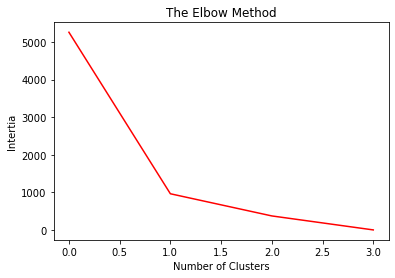

In [67]:
import matplotlib.pyplot as plt
plt.plot(range(len(wcss)), wcss, color='r')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Intertia')
plt.show()

In [135]:
data.groupby('Series').size()

Series
ATP250         6225
ATP500         2336
GrandSlam      2920
Masters          47
Masters1000    3132
MastersCup       75
dtype: int64

In [136]:
#game 1: callie is fav, steve wins
#game 2: callie is fav, callie wins
#game 3: steve is fav, callie wins
#player_wins: callie = 1, steve = 0
#player_games: callie = 3, steve = 3
#1/3 of the time callie wins and she's the fav

In [137]:
player1_favorite = 0
player2_favorite = 0
overall_favorite = 0
player_wins = collections.defaultdict(int)
player_games = collections.defaultdict(int)
for idx,row in data.iterrows():
    if row['Winner'] == row['Player1'] and row['Player1_Odds'] < row['Player2_Odds']:
        player_wins[row['Player1']] += 1
        player_games[row['Player1']] += 1
        player1_favorite = player1_favorite + 1
        overall_favorite = overall_favorite + 1
    elif row['Winner'] == row['Player2'] and row['Player2_Odds'] < row['Player1_Odds']:
        player_wins[row['Player2']] += 1
        player_games[row['Player2']] += 1
        player2_favorite = player2_favorite + 1
        overall_favorite = overall_favorite + 1
    else:
        player_games[row['Player1']] += 1
        player_games[row['Player2']] += 1
        continue

In [138]:
player_percent = collections.defaultdict(float)
for k,v in player_wins.items():
    if player_games[k] > 5:
        player_percent[k] = v/player_games[k]

In [139]:
sorted_favorites = {k: v for k,v in sorted(player_percent.items(),key=lambda item:item[1],reverse=True)}
sorted_favorites

{'DjokovicN.': 0.8954869358669834,
 'NadalR.': 0.8440111420612814,
 'FedererR.': 0.8413173652694611,
 'ChelaJ.I.': 0.8333333333333334,
 'MurrayA.': 0.8328690807799443,
 'AndreevI.': 0.7857142857142857,
 'FerrerD.': 0.7739130434782608,
 'BerdychT.': 0.76,
 'DelPotroJ.M.': 0.7539267015706806,
 'NishikoriK.': 0.7320261437908496,
 'BautistaAgutR.': 0.7313432835820896,
 'TsongaJ.W.': 0.7303370786516854,
 'RaonicM.': 0.7269736842105263,
 'GasquetR.': 0.7137546468401487,
 'WawrinkaS.': 0.7051282051282052,
 'MonfilsG.': 0.7027027027027027,
 'CilicM.': 0.6992753623188406,
 'DimitrovG.': 0.6741573033707865,
 'WilliamsR.': 0.6666666666666666,
 'AlmagroN.': 0.6650485436893204,
 'KohlschreiberP.': 0.6571428571428571,
 'AndersonK.': 0.6554621848739496,
 'FishM.': 0.6486486486486487,
 'SimonG.': 0.6451612903225806,
 'IsnerJ.': 0.635036496350365,
 'BautistaR.': 0.6287425149700598,
 'GoffinD.': 0.6269430051813472,
 'WangJ.': 0.625,
 'KyrgiosN.': 0.5964912280701754,
 'VerdascoF.': 0.596244131455399,
 'T

KeyError: 'Name'

In [140]:
print(player1_favorite, player2_favorite, overall_favorite)

5197 5236 10433


In [141]:
avg_wins_fav = (player1_favorite + player2_favorite)/len(data)
avg_wins_fav

0.7080420766881574

In [142]:
above_avg = [k for k,v in sorted_favorites.items() if v > avg_wins_fav]
above_avg

['DjokovicN.',
 'NadalR.',
 'FedererR.',
 'ChelaJ.I.',
 'MurrayA.',
 'AndreevI.',
 'FerrerD.',
 'BerdychT.',
 'DelPotroJ.M.',
 'NishikoriK.',
 'BautistaAgutR.',
 'TsongaJ.W.',
 'RaonicM.',
 'GasquetR.']

In [ ]:
#surface
#odds data set interesting
#draw on match ups
#failed w first cluster
#succeeded w second cluster
#correlation w spread of odds
#led to path of how many times ppl won and who won when they were the favorite